In [158]:

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install easygui 

#pip install chefboost

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [285]:
import time
start = time.time()
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import RandomForestClassifier #RANDOM FOREST Classifier
from sklearn.ensemble import RandomForestRegressor #RANDOM FOREST Regressor
from sklearn import svm #SVM
from sklearn.naive_bayes import MultinomialNB #NB
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.datasets import load_iris
from sklearn.externals import joblib #load and save model
import pickle #load and save model
import easygui #GUI Message box


In [286]:
#READING DATASET
data_file_path = r"DSWDataSet.csv"
df = pd.read_csv(data_file_path)
dff = df.copy()
#dff
#Day 	Room 	StartTIme 	EndTime 	Course 	Occupied
#df['StartTIme'] = df['StartTIme'].astype(float)
# create data
x = dff['Occupied']
y = dff['Room']
z = np.random.rand(40)

# use the scatter function
#plt.scatter(x, y, s=z*1000, alpha=0.5)
#plt.show()

In [219]:
#PREPARE FEATURE MATRIX
str_cols = dff.columns[dff.columns.str.contains('(?:Day|Room|Course)')]
clfs = {c:LabelEncoder() for c in str_cols}

for col, clf in clfs.items():
    dff[col] = clfs[col].fit_transform(dff[col])
    
X = dff.drop(['Occupied'],1)
x = df.drop(['Occupied'],1)
Y = dff["Occupied"]
y = df["Occupied"]

In [237]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=25)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=25)
#X_test
#
TESTDATA = [1,16,8.3,9.5,95,1]
#testt = TESTDATA.copy()
testt = TESTDATA
test=testt.pop()
#testt= [4,33,8.3,11.15 ,22]
testt = pd.DataFrame(testt).T
#testt,test,X_train

In [238]:
#Day 	Room 	StartTIme 	EndTime 	Course 	Occupied
# use the function regplot to make a scatterplot
#sns.regplot(x=df["Day"], y=df["Occupied"])
#sns.plt.show()

# Basic correlogram
#sns.pairplot(df)
#sns.plt.show()


# with regression
#sns.pairplot(df, kind="reg")
#plt.show()
 
# without regression
#sns.pairplot(df, kind="scatter")
#plot.show()

# Without regression fit:
#sns.regplot(x=df["Day"], y=df["Occupied"], fit_reg=False)
#X, y = load_iris(return_X_y=True)

In [239]:

#CLASSIFIER
#KNN
knnClassifier = KNeighborsClassifier(n_neighbors=2)
clf1 = knnClassifier.fit(X_train,Y_train)
knn_predi = clf1.predict(X_test)
#1 	11 	8.3 	9.50 	28
knn_predi = clf1.predict(testt)
print("knn_predi of KNN ",knn_predi[0])
if knn_predi == test:
  print("KNN Result Accurate",test)
else:
  easygui.msgbox(TESTDATA, title="Suspecious Activity!")
scoreKNN = clf1.score(X_test, y_test)
print("Score of KNN ",scoreKNN*100)

('knn_predi of KNN ', 1)
('KNN Result Accurate', 1)
('Score of KNN ', 98.36956521739131)


In [280]:
#NN
from sklearn.neural_network import MLPClassifier
#svmClassifier =  svm.LinearSVC(C=1.0,random_state=10, dual=False)
#solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
#activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, 
NNClassifier = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100,),activation='logistic',  random_state=1,max_iter=10000)
clf6 = NNClassifier.fit(X_train,Y_train)
NN_predi = clf6.predict(X_test)
NN_predi = clf6.predict(testt)
scoreNN = clf6.score(X_test, Y_test)
if NN_predi == test:
  print("SVM Result Accurate",test)
else:
  easygui.msgbox(TESTDATA, title="Suspecious Activity!")
print("knn_predi of SVM ",NN_predi[0])
print("Score of SVM ",scoreNN*100)

('SVM Result Accurate', 1)
('knn_predi of SVM ', 1)
('Score of SVM ', 97.82608695652173)


In [270]:
#SVM

#svmClassifier =  svm.LinearSVC(C=1.0,random_state=10, dual=False)
svmClassifier =  svm.SVC(decision_function_shape='ovo')
clf3 = svmClassifier.fit(X_train,Y_train)
svm_predi = clf3.predict(X_test)
svm_predi = clf3.predict(testt)
scoreSVM = clf3.score(X_test, Y_test)
if svm_predi == test:
  print("SVM Result Accurate",test)
else:
  easygui.msgbox(TESTDATA, title="Suspecious Activity!")
print("knn_predi of SVM ",svm_predi[0])
print("Score of SVM ",scoreSVM*100)

('SVM Result Accurate', 1)
('knn_predi of SVM ', 1)
('Score of SVM ', 99.45652173913044)


In [247]:
#NB
NBClassifier = MultinomialNB()
clf2 = NBClassifier.fit(X_train, Y_train)
nb_predi = clf2.predict(X_test)
nb_predi = clf2.predict(testt)
scoreNB=clf2.score(X_test, Y_test)
if nb_predi == test:
  print("NB Result Accurate",test)
else:
  easygui.msgbox(TESTDATA, title="Suspecious Activity!")
print("knn_predi of SVM ",nb_predi[0])
print("Score of NB ",scoreNB*100)


('NB Result Accurate', 1)
('knn_predi of SVM ', 1)
('Score of NB ', 64.13043478260869)


In [228]:
#RANDOM FOREST ALGORITHM

#Create a Gaussian Classifier
#clf4=RandomForestClassifier(n_estimators=100)
clf4=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
# Create REGRESSOR
#clf4= RandomForestRegressor(n_estimators=20, random_state=0) #REGRESSOR
#Train the model using the training sets y_pred=clf.predict(X_test)
clf4.fit(X_train,Y_train)

RF_pred=clf4.predict(X_test)
#RF_pred=clf4.predict(testt)
scoreRF=clf4.score(X_test, Y_test)
print("Accuracy:",metrics.accuracy_score(Y_test, RF_pred))
print("Score of RF ",scoreRF*100)
print("pred of RF ",RF_pred)
# Calculate the absolute errors
errors = abs(RF_pred - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Accuracy:', 1.0)
('Score of RF ', 100.0)
('pred of RF ', array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0], dtype=int64))
('Mean Absolute Error:', 0.0, 'degrees.')


In [229]:
#CLASSIFIER
#Decision Tree
clf5 = DecisionTreeClassifier(criterion="entropy", max_depth=3,max_leaf_nodes = 20)

# Train Decision Tree Classifer
clf5 = clf5.fit(X_train,Y_train)

#Predict the response for test dataset
DT_predi = clf5.predict(X_test)
#DT_predi = clf5.predict(testt)
scoreDT = clf5.score(X_test, Y_test)
print("Accuracy:",metrics.accuracy_score(Y_test, DT_predi))
print("Score of DT ",scoreDT*100)
print("pred of DT ",DT_predi)

('Accuracy:', 0.9945652173913043)
('Score of DT ', 99.45652173913044)
('pred of DT ', array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0], dtype=int64))


In [230]:
#Saving & Loading Models

import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_DT_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(clf5, file)

# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_DT_Model = pickle.load(file)

Pickled_DT_Model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [231]:
print(confusion_matrix(y_test,RF_pred))
print(classification_report(y_test,RF_pred))
print(accuracy_score(y_test, RF_pred))

[[ 76   0]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00       108

   micro avg       1.00      1.00      1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184

1.0


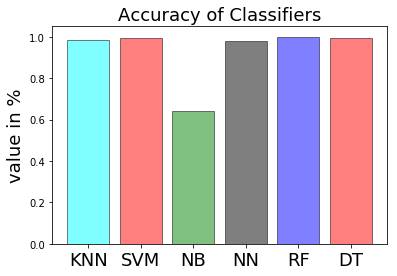

In [281]:
#SHOW RESULTS 

xx = [scoreKNN,scoreSVM,scoreNB,scoreNN, scoreRF,scoreDT]
objects = ('KNN', 'SVM','NB', 'NN','RF','DT')
y_pos = np.arange(len(objects))

plt.bar(y_pos, xx, align='center', alpha=0.5 , color=['cyan', 'red', 'green','black','blue','red',],edgecolor='black')
plt.xticks(y_pos, objects, fontsize=18)
plt.ylabel('value in %', fontsize=18)
plt.title('Accuracy of Classifiers',fontsize=18)

plt.show()


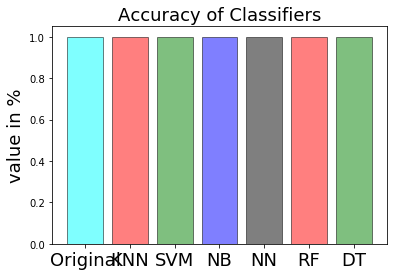

In [284]:
#SHOW RESULTS 
xx = [test, knn_predi,svm_predi,nb_predi,NN_predi,RF_pred[0],DT_predi[0]]
objects = ('Original','KNN', 'SVM','NB','NN' ,'RF','DT')
y_pos = np.arange(len(objects))

plt.bar(y_pos, xx, align='center', alpha=0.5 , color=['cyan', 'red', 'green','blue','black','red','green'],edgecolor='black')
plt.xticks(y_pos, objects, fontsize=18)
plt.ylabel('value in %', fontsize=18)
plt.title('Accuracy of Classifiers',fontsize=18)

plt.show()

In [234]:
easygui.msgbox("This is a message!", title="simple gui")

'OK'

In [235]:
df = X_test.copy()
df['Actual'] = Y_test
df['Prediction'] = DT_predi #knn_predi #svm_predi #nb_predi #RF_pred #DT_predi
df

,Day,Room,StartTIme,EndTime,Course,Actual,Prediction
400,0,37,10.0,11.20,200,1,1
512,4,3,11.3,12.50,195,1,1
159,2,28,8.3,11.15,130,1,1
53,3,23,8.3,9.50,188,0,0
200,0,28,8.3,11.15,62,1,1
299,4,25,10.0,11.20,188,0,0
589,0,9,11.3,12.50,188,0,0
413,1,16,11.3,12.50,185,1,1
166,0,14,8.3,9.50,20,1,1
547,2,8,11.3,12.50,188,0,0


In [17]:
 # Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot# Pull out one tree from the forest
tree = rf.estimators_[5]# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')# Write graph to a png file
graph.write_png('tree.png')

ImportError: No module named pydot